<a href="https://colab.research.google.com/github/andreamwalker/ast8581_2021_Spring/blob/inclass/lecture/02/lecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'height': 1080, 'scroll': True, 'width': 1920}

# Week 02 (Monday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


With contributions totally ripped off from Zjelko Ivezic and Mario Juric (UW), Gordon Richards (Drexel), Federica Bianco (U. Del), Maria Suveges (EPFL), and Gautham Narayan (UIUC)



## RECAP

* You ran your first python notebook on google colab and worked through the python tutorial!
* CSE lab machines are also available (in case folks prefer those)

## HOMEWORK 1 is posted!

https://github.umn.edu/umn-csci-8581-S21/assignments

## More help with git/os commands/python in the help/ directory

<center> <img src ="./figures/git.png" width="800"> </center>

## CREATING / SYNCING FORK
* https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/syncing-a-fork
* git remote -v
* Check if my repo is already there! If not:
* git remote add upstream https://github.com/mcoughlin/ast8581_2021_Spring.git
* git fetch upsteam
* get checkout master
* git merge upstream/master
* git push origin master

## We’re not focusing on git/python/os usage - pick it up as we go.
* What the class is NOT
   * A Statistics Class
   * A Math Methods Class
   * A Computer Science Class
   * A Programming Class

# DATA

<center> <img src ="./figures/survey.png" width="800"> </center>

## WHAT ASTRONOMERS CAN MEASURE
* Angular separations
* Time differences
* Energy differences

###  That’s it.

## WHAT ASTRONOMERS CAN MEASURE
* Astrometry (angular position on the sky) - arcseconds
* Related definition: 1 parsec (pc) = distance at which a distance of 1 AU (i.e. Earth-Sun) subtends and angle of 1 arcsecond, i.e. 1 pc = 1 AU/tan(1”) ~ 31 trillion kilometers or 3.26 light years (ly)
* Photometry (how bright something is)
* Flux = photons (or energy in ergs)/sec/cm^2
* (Apparent) Magnitude = -2.5 log10(Flux) + const
* (Absolute) Magnitude = -2.5log10(Luminosity) + const = magnitude you’d measure if you could move the source to 10 pc
* Light curves = photometry vs time
* Evolution in source brightness either because of intrinsic (supernovae, AGN) or extrinsic (asteroids, eclipsing binaries)
* Spectroscopy = Energy vs wavelength/frequency
* Images/maps = Energy vs position on the sky (clustering, spatial correlation functions)
* Proper Motion = Astrometry vs time (e.g. stars, satellite galaxies, asteroids…)

**Notes:** we measure distance, energy, time

<center> <img src ="./figures/spectrum.png" width="800"> </center>

**Notes:** In figure a, we have an underlying emission, and then some flux / emissions at particular wavelengths; the H \alpha emission line is the Hydrogen spectra emisssion wavelength. 

<center> <img src ="./figures/images.png" width="800"> </center>

## Temporal & Spatial Variation

<center> <img src ="./figures/spatial_temporal.png" width="800"> </center>

## Spatial Variation

<center> <img src ="./figures/cmb.png" width="800"> <img src ="./figures/cmb_spectrum.png" width="800"> </center>

**Notes** \\
^^ Cosmic microwave background \\
Interested in the time evolution of the background \\
May study things in the time domain or the frequency domain (Fourier transform)

## Visualization

* Dealing with spectra (1-D data):
   * Programmatic: Use pandas to load the ascii spectrum and plot it
* Dealing with images (2-D data):
   * Programmatic: Use astropy.io.fits to load a .fits image
   * Use ds9 to look at the images and adjust the scale

## Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.
### We formalize our beliefs in a probabilistic model.

# AXIOMS OF PROBABILITY

## SOME KEY IDEAS
* All of the data we collect include some degree of randomness
* Any conclusions we draw must therefore incorporate some notion of uncertainty
* There is a a correct answer - the Universe as we know it exists after all.
* Theory gives us a useful model for it. The challenging is evaluating how likely that model is given the data
* Data are constants.
* Even if they were randomly generated by the Universe, the data that we have already collected are fixed numbers.
* We describe things we don't know with perfect precision as "random"

## RANDOM VARIABLES

<center> <img src ="./figures/cartoon_probability.png" width="800"> </center>

<center> <img src ="./figures/random_variables.png" width="800"> </center>

## Random Variables

* Discrete:
   * Spectral type (G2V, KIII)
   * Galaxy type, galaxy zoo
* Continuous:
   * magnitude, flux, colour, radial velocity, parallax/distance, temperature, elemental abundances, magnetic field, age, etc...

# Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.

## We formalize our beliefs in a probabilistic model.

## THE MULTIVARIATE CASE

<center> <img src ="./figures/2D.png" width="800"> </center>

<center> <img src ="./figures/marginal.png" width="800"> </center>

## Bayes

<center> <img src ="./figures/bayes.png" width="800"> </center>

* Posterior Likelihood: How probable is the hypothesis given the data we observed
* Prior: How probable was the hypothesis before we observed anything
* Likelihood: How probable is the data given the hypothesis is true
* Evidence: How probable is the data over all possible hypotheses

## IN CLASS EXERCISE
* Download this file (too big for git!): https://bit.ly/38PDnGy
   * Use h5py to look at this data - h5py.File() to open, and then use the keys() method to find what elements are store
   * You want “chain” and then “position”
* Use numpy to get the stored data as an array
* Use matplotlib to visualize this point cloud (CAREFUL)
* Use pandas to convert the first two columns of the numpy array to a dataframe
* Use seaborn’s jointplot to visualize this dataframe (try hex, or a kde with every 100th sample)

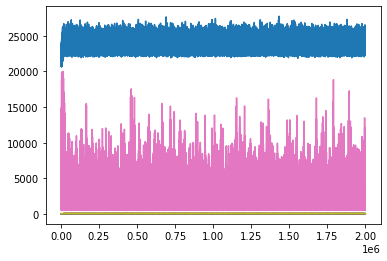

(2000000, 2)
(20000, 2)


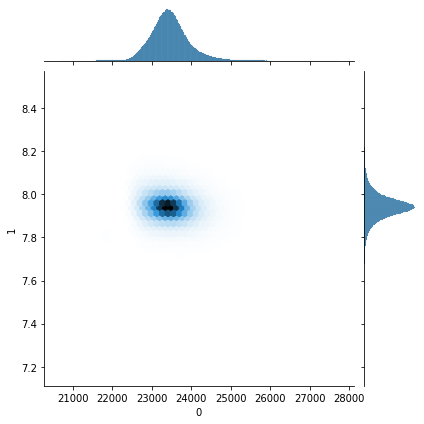

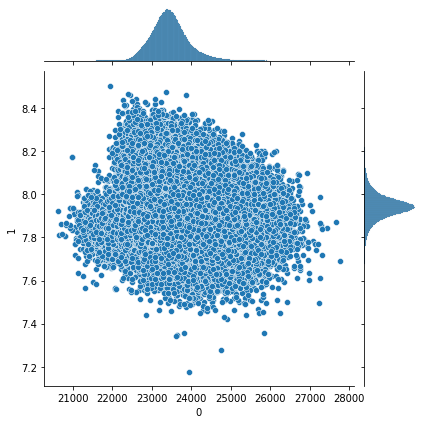

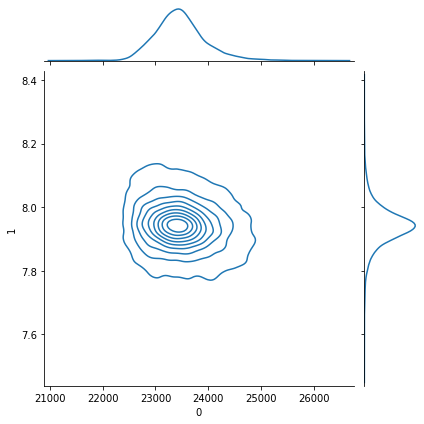

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import h5py
import pandas as pd
import seaborn as sns

f = h5py.File('sdssj120650-20130310-total_mcmc.hdf5', 'r')
list(f.keys())
chain_dset = np.array(f['chain']['position'])

plt.plot(chain_dset)
plt.show()

print(chain_dset[:,:2].shape)
df = pd.DataFrame(chain_dset[:,:2])
df.head


sns.jointplot(data=df, x=0,y=1, kind='hex')
sns.jointplot(data=df, x=0,y=1)
sampled_data = df.iloc[::100, :]
#print(sampled_data.head)
print(sampled_data.shape)
sns.jointplot(data=df.iloc[::100, :], x=0,y=1, kind='kde')

#print(chain_dset)

# MOMENTS AND DISTRIBUTIONS

## Example: Flat / Tophat distribution

<center> <img src ="./figures/tophat.png" width="800"> </center>

## Example: Gaussian / Normal distribution

<center> <img src ="./figures/normal.png" width="800"> </center>

## Example: Poisson distribution

<center> <img src ="./figures/poisson.png" width="800"> </center>

## Example: Skewness, asymmetry

<center> <img src ="./figures/skewness.png" width="800"> </center>

## So many distributions

<center> <img src ="./figures/distributions.png" width="800"> </center>

* Lawrence M Leemis & Jacquelyn T McQueston (2008) “Univariate Distribution Relationships”, The American Statistician, 62:1, 45-53, DOI: 10.1198/000313008X270448

## Quantile

<center> <img src ="./figures/quantile.png" width="800"> </center>

* So given a nice distribution function, you can calculate the mean, variance and moments ...
* ... but you don’t usually have a nice distribution function given to you.
* The distribution function is the thing you are trying to infer!
* P(H|D)
* The thing you have are the data - observations

## IN CLASS EXERCISE
* Download this file (too big for git!): https://bit.ly/38PDnGy
* Use h5py to look at this data - h5py.File() to open, and then use the keys() method to find what elements are stored - you want “chain” and then “position”
* Use pandas to convert the first two columns of the numpy array to a dataframe (maybe you should make the above a function) and again plot every 100th point with a low alpha using matplotlib
* Remember our goal is to infer a hypothesis from data i.e. P(H|D)
* Estimate the means and standard deviations in both x and y by eye
* Now use scipy.stats.multi_variate normal to construct a distribution object in python and overlay it with matplotlib (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html)
* Finally, see how well your eyeball estimate matches astroML.stats.fit_bivariate_normal

# ESTIMATORS

## Data, samples

* Usually we have observations, e.g. additive process, i.e. y(i) = f(i) +  n(i), where f(i) is deterministic and n(i) is a random variable
* We want a characterisation of the deterministic and random parts
* Suppose something about the random variable, often normality
* We assume models and then estimate the parameters of a distribution, moments

## Quantile

<center> <img src ="./figures/qqplot.png" width="800"> </center>

# IN CLASS EXERCISE
* Now that you know how to generate points from a distribution, we can use the QQ plot to compare distributions to each other, or to a normal distribution
* Use scipy.stats to generate some random numbers from a normal, uniform, and Cauchy distribution
* Use statsmodels.api.qqplot to produce a qq plot of these distributions
* Now generate random numbers from two different normal distributions (different locations and variances) and concatenate them
* Again check the QQ plot